In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
train_data = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/train.csv')
test_data = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/test.csv')

In [4]:
both_null_rows = train_data[train_data['steward'].isnull() & train_data['guards'].isnull()]
all_null_rows = train_data[train_data['steward'].isnull() & train_data['guards'].isnull()&train_data['problems'].isnull()]
# どちらもnullである行の件数を取得
both_null_count = len(both_null_rows)

print("Both 'steward' and 'guards' are null in", both_null_count, "rows.")

Both 'steward' and 'guards' are null in 13007 rows.


In [5]:
both_null_rows['health'].value_counts()

health
1    10368
0     2170
2      469
Name: count, dtype: int64

In [6]:
not_both_null_rows = train_data[~(train_data['steward'].isnull() & train_data['guards'].isnull())]

In [10]:
not_both_null_rows['health'].value_counts()

health
1    5383
0    1365
2     229
Name: count, dtype: int64

In [8]:
print(not_both_null_rows.shape)
print(train_data.shape)

(6977, 22)
(19984, 22)


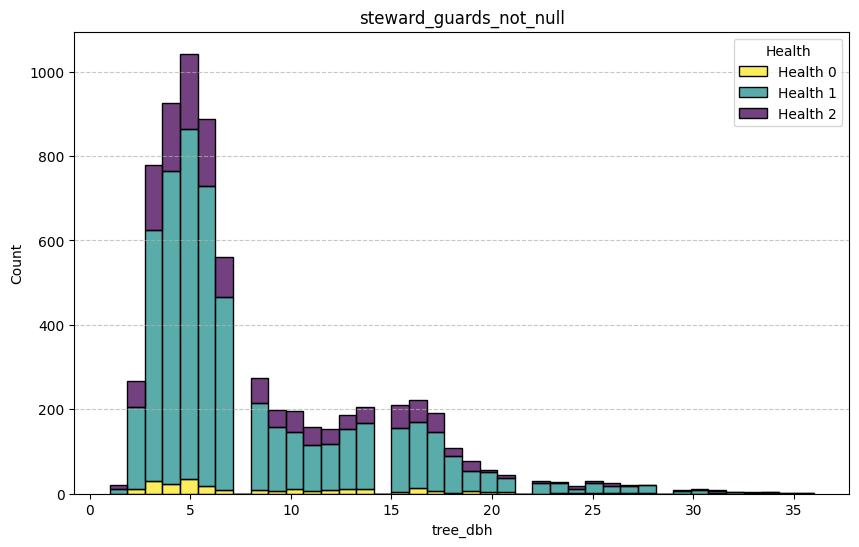

In [15]:

# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=not_both_null_rows, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('steward_guards_not_null')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

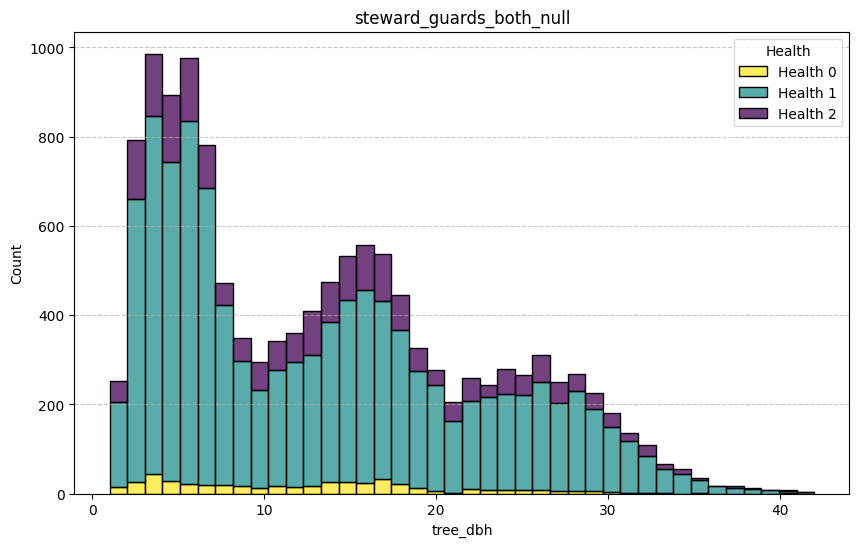

In [14]:

# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=both_null_rows, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('steward_guards_both_null')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [16]:
train_data['tree_dbh'].describe()

count    19984.000000
mean        11.694906
std          8.198150
min          1.000000
25%          5.000000
50%          9.000000
75%         17.000000
max         42.000000
Name: tree_dbh, dtype: float64

In [17]:
train_data.isnull().sum()

Unnamed: 0        0
created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [18]:
train_data.head()

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,English oak,Quercus robur,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,Acer platanoides 'Crimson King',BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,Quercus robur,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,honeylocust,Gleditsia triacanthos var. inermis,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,Platanus x acerifolia,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


In [20]:
train_data['spc_common'].value_counts()

spc_common
London planetree          2237
pin oak                   2140
cherry                    1689
Japanese zelkova          1470
littleleaf linden         1303
English oak               1277
green ash                 1089
Callery pear              1076
honeylocust               1034
Norway maple               634
Sophora                    545
ginkgo                     517
silver maple               422
American elm               407
American linden            336
red maple                  278
sweetgum                   219
silver linden              203
purple-leaf plum           196
Chinese elm                192
swamp white oak            183
maple                      165
crimson king maple         135
eastern redbud             116
'Schubert' chokecherry      98
Japanese tree lilac         93
crab apple                  90
dawn redwood                89
northern red oak            88
Siberian elm                81
willow oak                  62
sugar maple                 

In [22]:
maple_trees = train_data[train_data['spc_common'].str.contains('maple', case=False, na=False)]

In [23]:
maple_trees.shape

(1879, 22)

C:\Users\wgkdj\AppData\Local\Temp\ipykernel_23444\1579292429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maple_trees['created_at'] = pd.to_datetime(maple_trees['created_at'])
C:\Users\wgkdj\AppData\Local\Temp\ipykernel_23444\1579292429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maple_trees['weekdays'] = maple_trees['created_at'].dt.day_name()


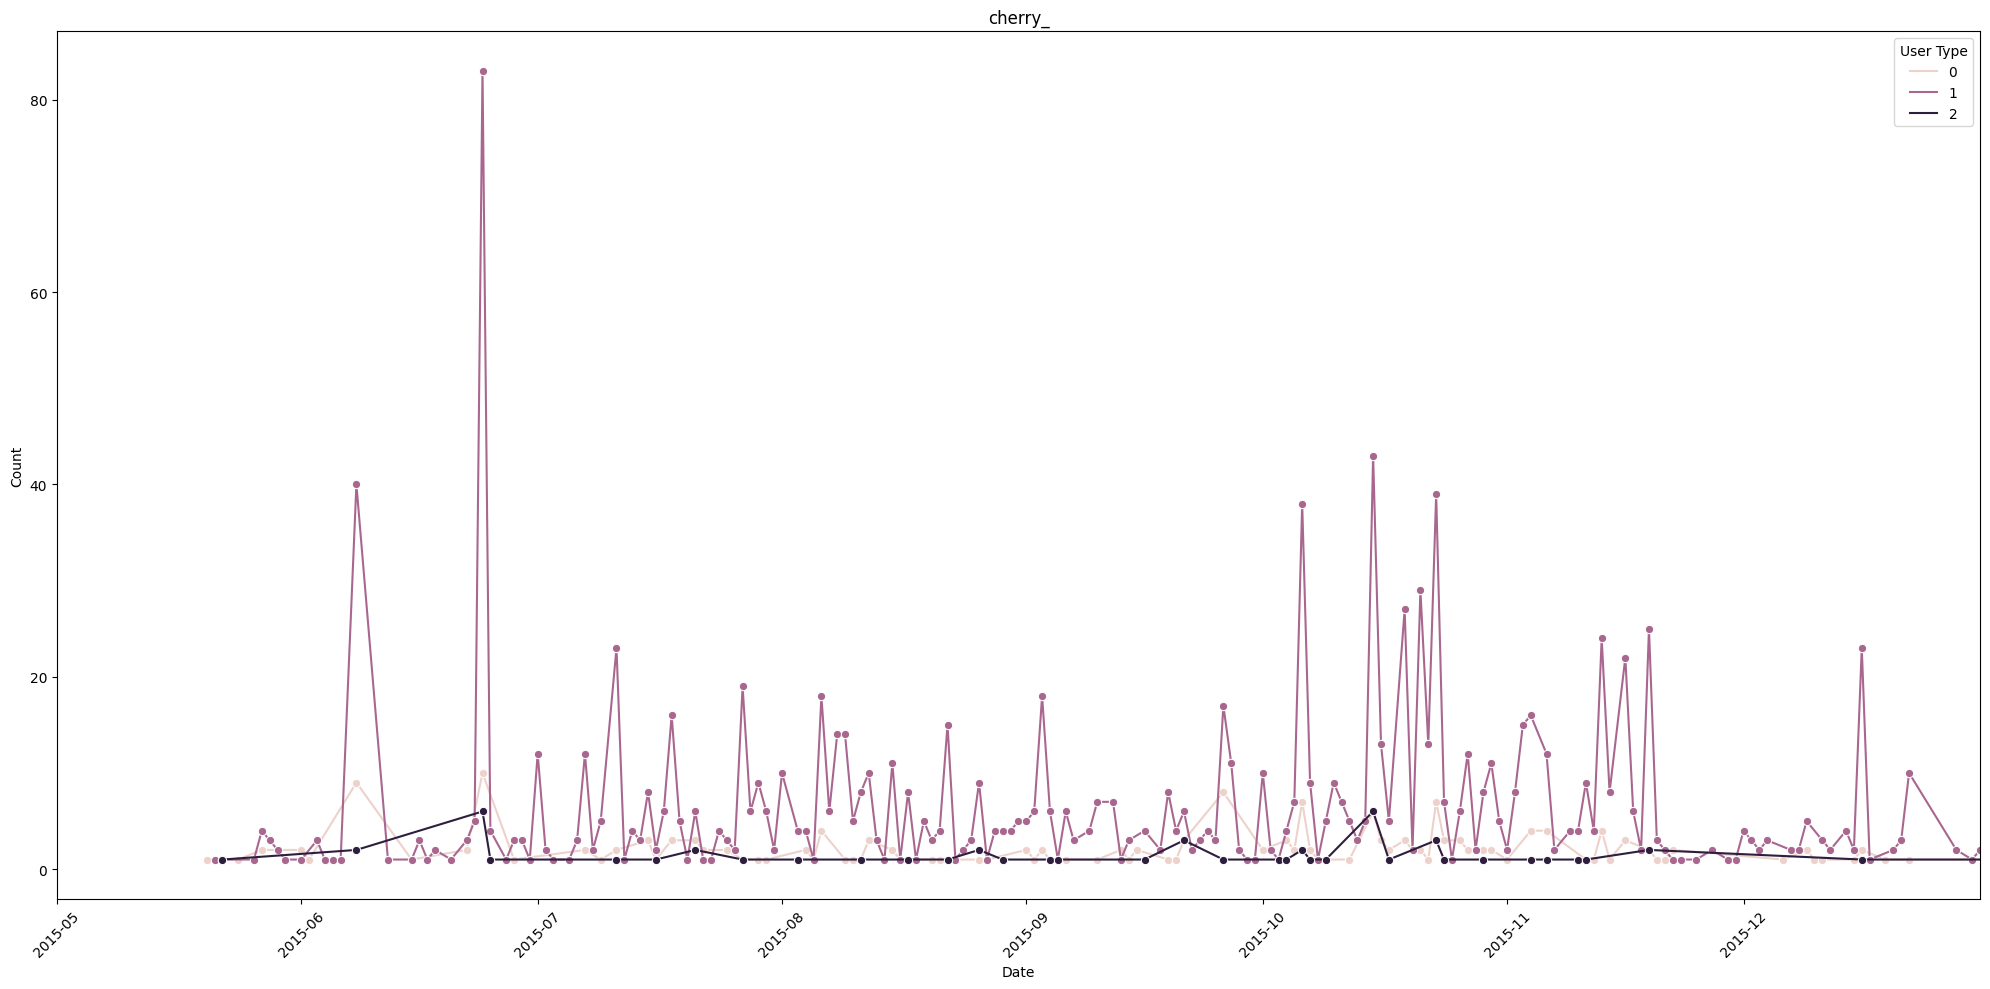

In [28]:
maple_trees = train_data[train_data['spc_common'].str.contains('cherry', case=False, na=False)]
maple_trees['created_at'] = pd.to_datetime(maple_trees['created_at'])

# 'weekdays'列を作成
maple_trees['weekdays'] = maple_trees['created_at'].dt.day_name()

# グループ化して各user_typeの個数を取得
grouped_data = maple_trees.groupby(['health', 'created_at']).size().reset_index(name='count')

# グラフの設定
plt.figure(figsize=(20, 10))

# 各user_typeごとにラインプロット
sns.lineplot(x='created_at', y='count', hue='health', data=grouped_data, marker='o')

# グラフの装飾
plt.title('cherry_')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 凡例を表示
plt.legend(title='User Type')
plt.xlim(pd.Timestamp('2015-05-01'), pd.Timestamp('2015-12-31'))
# グラフの表示
plt.tight_layout()
plt.show()

C:\Users\wgkdj\AppData\Local\Temp\ipykernel_23444\585131555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_null_rows['created_at'] = pd.to_datetime(both_null_rows['created_at'])
C:\Users\wgkdj\AppData\Local\Temp\ipykernel_23444\585131555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_null_rows['weekdays'] = both_null_rows['created_at'].dt.day_name()


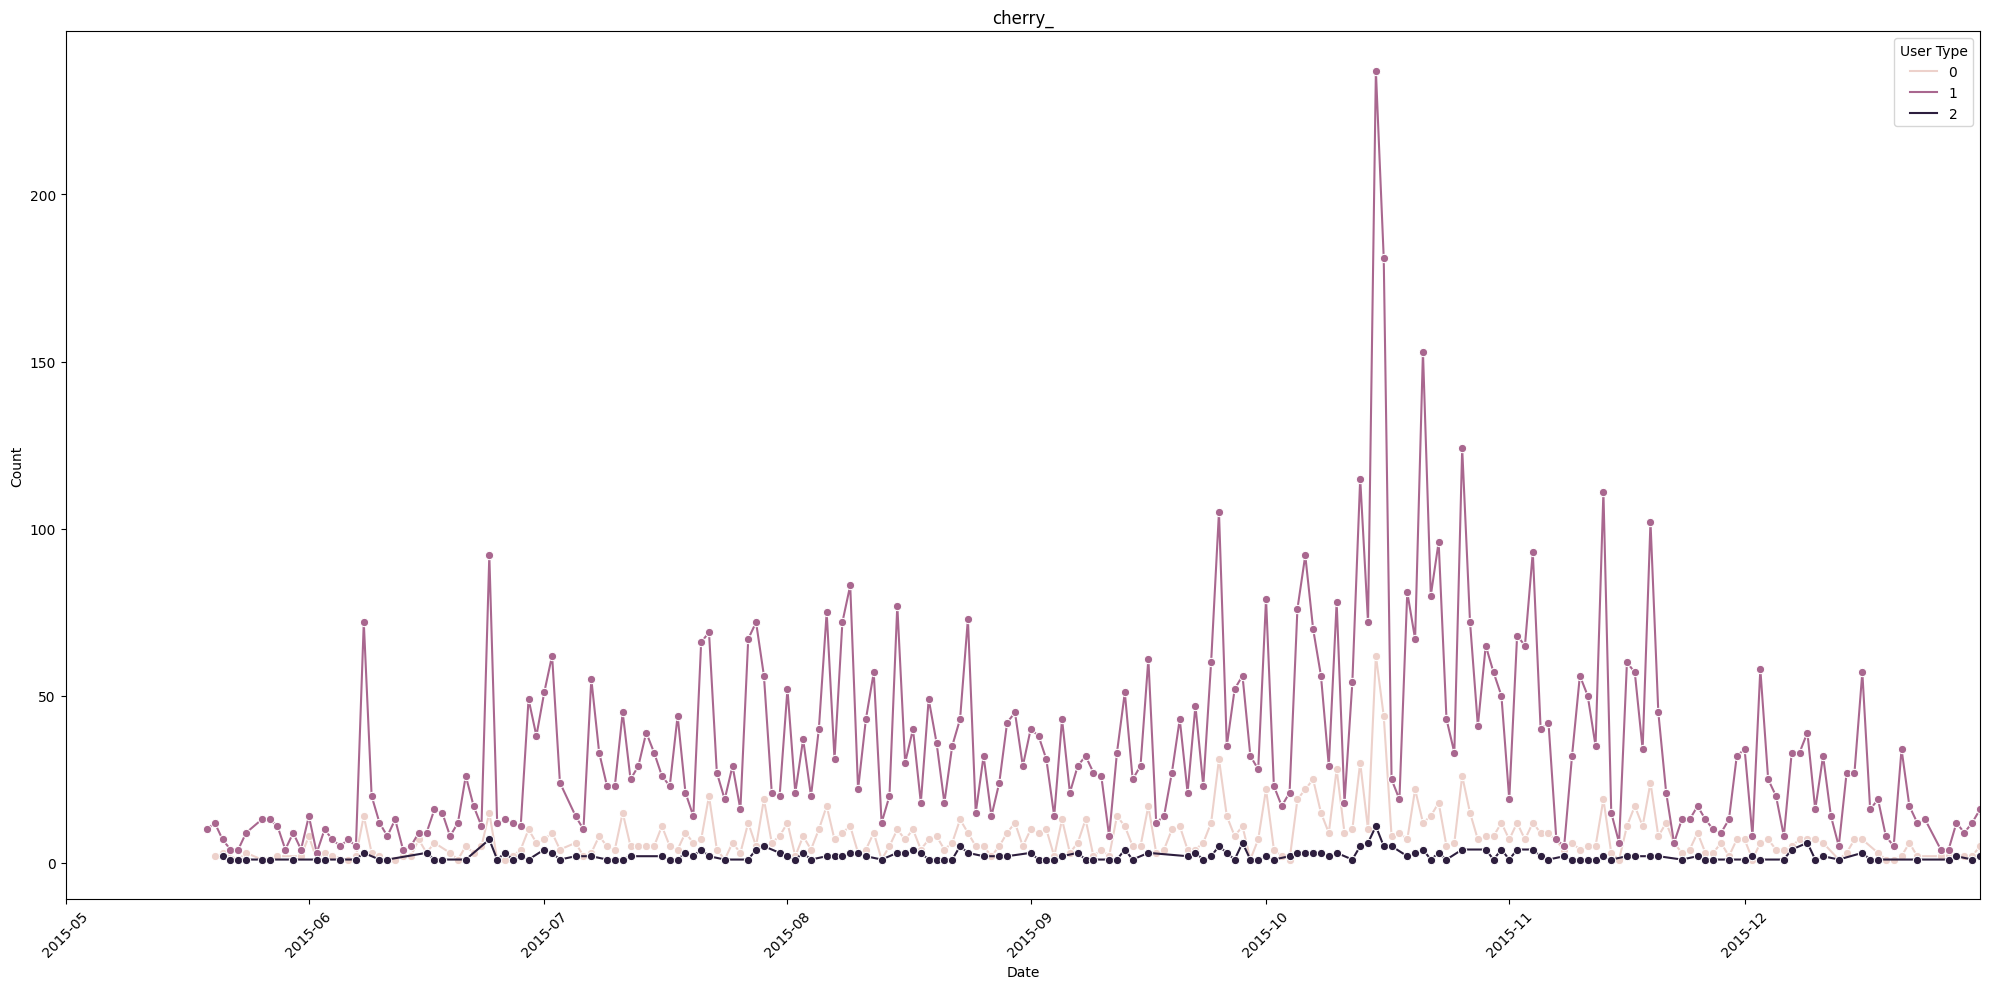

In [29]:
both_null_rows['created_at'] = pd.to_datetime(both_null_rows['created_at'])

# 'weekdays'列を作成
both_null_rows['weekdays'] = both_null_rows['created_at'].dt.day_name()

# グループ化して各user_typeの個数を取得
grouped_data = both_null_rows.groupby(['health', 'created_at']).size().reset_index(name='count')

# グラフの設定
plt.figure(figsize=(20, 10))

# 各user_typeごとにラインプロット
sns.lineplot(x='created_at', y='count', hue='health', data=grouped_data, marker='o')

# グラフの装飾
plt.title('cherry_')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 凡例を表示
plt.legend(title='User Type')
plt.xlim(pd.Timestamp('2015-05-01'), pd.Timestamp('2015-12-31'))
# グラフの表示
plt.tight_layout()
plt.show()

C:\Users\wgkdj\AppData\Local\Temp\ipykernel_23444\3494187923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_both_null_rows['created_at'] = pd.to_datetime(not_both_null_rows['created_at'])
C:\Users\wgkdj\AppData\Local\Temp\ipykernel_23444\3494187923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_both_null_rows['weekdays'] = not_both_null_rows['created_at'].dt.day_name()


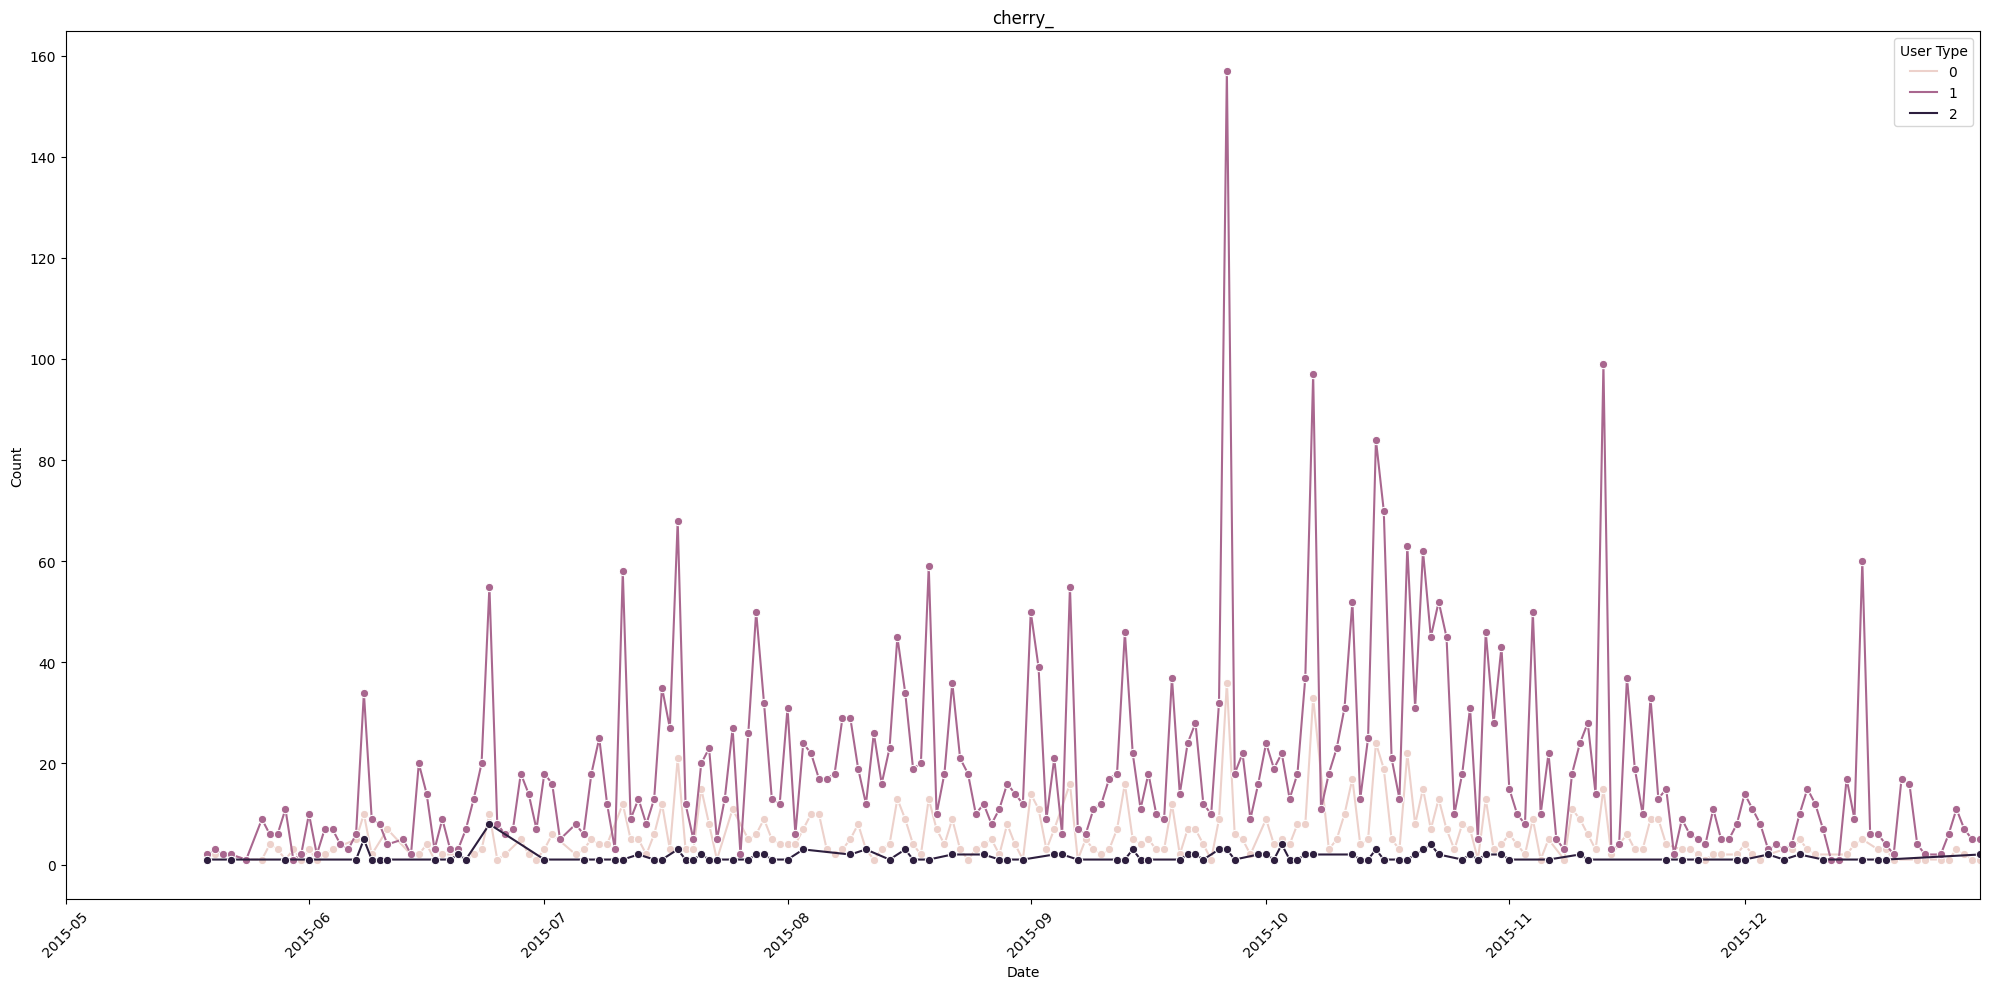

In [30]:
not_both_null_rows['created_at'] = pd.to_datetime(not_both_null_rows['created_at'])

# 'weekdays'列を作成
not_both_null_rows['weekdays'] = not_both_null_rows['created_at'].dt.day_name()

# グループ化して各user_typeの個数を取得
grouped_data = not_both_null_rows.groupby(['health', 'created_at']).size().reset_index(name='count')

# グラフの設定
plt.figure(figsize=(20, 10))

# 各user_typeごとにラインプロット
sns.lineplot(x='created_at', y='count', hue='health', data=grouped_data, marker='o')

# グラフの装飾
plt.title('cherry_')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 凡例を表示
plt.legend(title='User Type')
plt.xlim(pd.Timestamp('2015-05-01'), pd.Timestamp('2015-12-31'))
# グラフの表示
plt.tight_layout()
plt.show()